```python
df.groupby('QLabel').filter(lambda x: x['year'].nunique() <= 3)

for i in CPCleanedUnique:
    targdf=df[df.CPCleaned==i]
    vcdf=targdf.QCleaned.value_counts().rename_axis('QCleaned').reset_index(name='counts')
    # print(vcdf)
    break

def f(cpname,thres):
    global df
    targdf=df[df.CPCleaned==cpname]
    vcdf=targdf.QCleaned.value_counts().rename_axis('QCleaned').reset_index(name='counts')
    unqualQ=list(vcdf[vcdf.counts<6476].QCleaned)
    gQ=groupSent(unqualQ,threshold=thres)
    for i in gQ:
        print(i, sum([int(vcdf[vcdf.QCleaned==x].counts) for x in i]),sep="\n")

```

In [1]:
import pandas as pd
import os
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def groupSent(sentences, threshold=0.75):
    # Load pre-trained Sentence-BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(sentences,show_progress_bar=False)
    clustering = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=1-threshold)
    clustering.fit(embeddings)
    clusters = {}
    for sentence_id, cluster_id in enumerate(clustering.labels_):
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(sentences[sentence_id])
    return [group for group in clusters.values()]

genSubRule=lambda lol: {x: sorted(t, key=lambda x: len(x))[0] for t in lol for x in t}

d:\Software\Anaconda3\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [97]:
def getQNum(qstr):
    global df
    return len(df[df.QCleaned==qstr])

def keyWordQuery(kw):
    global df
    return df[df.Q.str.contains(kw)]

def tabCountry(q):
    global df
    return df[df.QCleaned==q].Country.value_counts()

In [171]:
df=pd.read_csv("7c.csv").rename(columns={"QLabel":"Q","Itemscleaned":"QCleaned","CPcleaned":"CPCleaned"})
df["cleaned"]=0
df.QCleaned=df.QCleaned.fillna(df.Q)
df.QCleaned=df.QCleaned.str.strip()
df.head(1)

,Country,FactoryAssessedID,AssesmentDate,QuestID,CP,Q,Finding,QCleaned,CPCleaned,cleaned
0,Vietnam,1509,06/01/2015,8009,Emergency Preparedness,"Are any of the emergency exits inaccessible, o...",1,Accessable unlocked emergency exits,Emergency Preparedness,0


In [3]:
df[df.CP!= df.CPCleaned].CPCleaned.unique()

array(['Freedom to Associate', 'Hazardous Work and other Worst Forms'],
      dtype=object)

In [4]:
df.QCleaned.value_counts()

Terminate workers due to pregnancy or maternity leave                                                        6567
Accessable unlocked emergency exits                                                                          6476
Free exit from workplace at all times                                                                        6476
Electrical wires/switches/plugs properly installed                                                           6476
Safety warnings posted                                                                                       6476
                                                                                                             ... 
Do workers have a medical check within the first three months of hiring and annual medical checks?              5
Does the employer forward workers contributions to ONA?                                                         5
Do workers have chairs with backrests?                                                  

In [5]:
vc=df['QCleaned'].value_counts()
df[df['QCleaned'].isin(vc[vc >= 6476].index)]

,Country,FactoryAssessedID,AssesmentDate,QuestID,CP,Q,Finding,QCleaned,CPCleaned,cleaned
0,Vietnam,1509,06/01/2015,8009,Emergency Preparedness,"Are any of the emergency exits inaccessible, o...",1,Accessable unlocked emergency exits,Emergency Preparedness,0
1,Vietnam,1509,06/01/2015,8009,Overtime Wages,Does the employer pay workers correctly for al...,1,Payment of overtime,Overtime Wages,0
2,Vietnam,1509,06/01/2015,8009,Gender,Is the gender or marital status of a worker a ...,0,Gender discrimination on conditions of work,Gender,0
3,Vietnam,1509,06/01/2015,8009,Welfare Facilities,Does the employer provide workers enough free ...,0,Providing drinking water,Welfare Facilities,0
4,Vietnam,1509,06/01/2015,8009,Union Operations,Does the employer require workers to join a un...,0,Employer requires workers to join a union,Freedom to Associate,0
...,...,...,...,...,...,...,...,...,...,...
1053492,Jordan,1430,26/08/2021,43788,Interference and Discrimination,Does the employer punish workers for joining a...,0,Punish unionists,Interference and Discrimination,0
1053516,Jordan,1430,26/08/2021,43788,Coercion,Does the employer restrict workers' freedom to...,0,Does the employer restrict workers' freedom to...,Coercion,0
1053522,Jordan,1430,26/08/2021,43788,Interference and Discrimination,"Does the employer threaten, intimidate, or har...",0,"Does the employer threaten, intimidate, or har...",Interference and Discrimination,0
1053544,Jordan,1430,26/08/2021,43788,Worker Protection,"Are electrical wires, cables, switches, plugs ...",0,Electrical wires/switches/plugs properly insta...,Worker Protection,0


In [6]:
vcdf=df['QCleaned'].value_counts().rename_axis('QCleaned').reset_index(name='counts')
vcdf

,QCleaned,counts
0,Terminate workers due to pregnancy or maternit...,6567
1,Accessable unlocked emergency exits,6476
2,Free exit from workplace at all times,6476
3,Electrical wires/switches/plugs properly insta...,6476
4,Safety warnings posted,6476
...,...,...
625,Do workers have a medical check within the fir...,5
626,Does the employer forward workers contribution...,5
627,Do workers have chairs with backrests?,5
628,Are workers effectively trained and encouraged...,5


In [7]:
# rerun after each substitute:
cleaned=vcdf[vcdf.counts>=6376]["QCleaned"]
vcdf[vcdf.counts>=6376]

,QCleaned,counts
0,Terminate workers due to pregnancy or maternit...,6567
1,Accessable unlocked emergency exits,6476
2,Free exit from workplace at all times,6476
3,Electrical wires/switches/plugs properly insta...,6476
4,Safety warnings posted,6476
5,Does the employer restrict workers' freedom to...,6476
6,"Does the employer threaten, intimidate, or har...",6476
7,Implement CBA,6476
8,Punish workers for striking,6476
9,Periodic emergency drills,6476


In [100]:
df.CPCleaned.unique()

array(['Emergency Preparedness', 'Overtime Wages', 'Gender',
       'Welfare Facilities', 'Freedom to Associate',
       'Chemicals and Hazardous Substances', 'Forced Labour and Overtime',
       'Paid Leave', 'Wage Information, Use and Deduction',
       'Interference and Discrimination',
       'Dialogue, Discipline and Disputes', 'Coercion', 'Child Labourers',
       'OSH Management Systems', 'Minimum Wages/Piece Rate Wages',
       'Strikes', 'Collective Bargaining', 'Regular Hours',
       'Social Security and Other Benefits', 'Employment Contracts',
       'Contracting Procedures', 'Termination', 'Leave',
       'Union Operations', 'Worker Protection', 'Working Environment',
       'Health Services and First Aid',
       'Hazardous Work and other Worst Forms',
       'Religion and Political Opinion', 'Method of Payment',
       'Worker Accommodation', 'Race and Origin', 'Other Grounds',
       'Overtime', 'Documentation and Protection of Young Workers'],
      dtype=object)

In [103]:
df[df.CPCleaned=="Gender"].QCleaned.unique()

array(['Gender discrimination on conditions of work',
       'Terminate workers due to pregnancy or maternity leave',
       'Sexual harassment',
       'Is the gender or marital status of a worker a factor in decisions regarding pay?',
       'Is the gender or marital status of a worker a factor in decisions regarding opportunities for promotion or access to training?',
       'Is the gender or marital status of the worker a factor in employer decisions regarding termination or retirement of workers?',
       'Does the employer require pregnancy tests or use of contraceptives as a condition of employment?',
       'Does the employer change the employment status, position, wages, benefits or seniority of workers during maternity leave?',
       "Are periods of maternity leave included in a worker's period of continuous service?",
       'Do job announcements refer to the applicants gender or marital status?',
       "Is an applicant's gender or marital status a factor in hiring decisio

In [8]:
# check how many rows are cleaned: len(df[df.cleaned==1])
df[df.QCleaned.isin(cleaned)]

,Country,FactoryAssessedID,AssesmentDate,QuestID,CP,Q,Finding,QCleaned,CPCleaned,cleaned
0,Vietnam,1509,06/01/2015,8009,Emergency Preparedness,"Are any of the emergency exits inaccessible, o...",1,Accessable unlocked emergency exits,Emergency Preparedness,0
1,Vietnam,1509,06/01/2015,8009,Overtime Wages,Does the employer pay workers correctly for al...,1,Payment of overtime,Overtime Wages,0
2,Vietnam,1509,06/01/2015,8009,Gender,Is the gender or marital status of a worker a ...,0,Gender discrimination on conditions of work,Gender,0
3,Vietnam,1509,06/01/2015,8009,Welfare Facilities,Does the employer provide workers enough free ...,0,Providing drinking water,Welfare Facilities,0
4,Vietnam,1509,06/01/2015,8009,Union Operations,Does the employer require workers to join a un...,0,Employer requires workers to join a union,Freedom to Associate,0
...,...,...,...,...,...,...,...,...,...,...
1053516,Jordan,1430,26/08/2021,43788,Coercion,Does the employer restrict workers' freedom to...,0,Does the employer restrict workers' freedom to...,Coercion,0
1053522,Jordan,1430,26/08/2021,43788,Interference and Discrimination,"Does the employer threaten, intimidate, or har...",0,"Does the employer threaten, intimidate, or har...",Interference and Discrimination,0
1053544,Jordan,1430,26/08/2021,43788,Worker Protection,"Are electrical wires, cables, switches, plugs ...",0,Electrical wires/switches/plugs properly insta...,Worker Protection,0
1053571,Jordan,1430,26/08/2021,43788,Worker Protection,Are appropriate safety warnings posted in the ...,0,Safety warnings posted,Worker Protection,0


In [175]:
cleaned=list(vcdf[vcdf.counts>=6376]["QCleaned"])
df.loc[df.QCleaned.isin(cleaned), "cleaned"] = 1
df.cleaned.value_counts()

0    872267
1    181337
Name: cleaned, dtype: int64

In [10]:
QList=list(vcdf[vcdf.counts<6376].QCleaned)

In [172]:
grpdQ=groupSent(QList,threshold=0.75)
num6476=0
for i in range(len(grpdQ)):
    Qlist=grpdQ[i]
    if len(Qlist)>1:
        prefix=""
        brief=sorted(Qlist,key=lambda x : len(x))[0]
        tnum=sum([int(vcdf[vcdf["QCleaned"]==x]["counts"]) for x in Qlist])
        if tnum in range(6376, 6477):
            prefix="*"
            num6476+=1
        print(f"{prefix}\tlist {i}: {brief}, total number: {tnum}")
print(f"TOTAL: {num6476}")

d:\Software\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


	list 6: Has the employer tried to prevent workers from participating in a strike?, total number: 12418
	list 10: Did the employer resolve grievances and disputes in compliance with legal requirements?, total number: 6357
	list 12: Has the employer prepared for response, control and cleaning of chemical spills?, total number: 8519
	list 13: Does the employer terminate workers who are on maternity leave or force them to resign?, total number: 8238
*	list 15: Does the employer keep only one accurate payroll record?, total number: 6476
	list 19: Trained workers on first aid , total number: 6259
	list 20: Do the working time records reflect the hours actually worked?, total number: 5368
	list 21: Is an applicant's race, colour or origin a factor in hiring decisions?, total number: 11171
	list 22: Is race, colour or origin a factor in decisions regarding opportunities for promotion or access to training?, total number: 5643
	list 23: Does the employer compensate workers for unused paid annu

|threshold|total num|
|---|---|
|65%|6|
|70%|6|
|75%|8|
|80%|8|
|85%|5|

In [12]:
grpdQ[66]

['Do regular daily or weekly working hours exceed the legal limit?',
 'Do regular working hours exceed 10 hours per day, or 48 hours per week?',
 'Do regular daily and weekly working hours exceed legal limits (40 hours per week; 7 hours a day, 6 days a week or 8 hours per day, 5 days a week)?',
 'Do regular daily or weekly working hours exceed the legal limit (8 hours per day, 48 hours per week)?',
 'Do regular working hours exceed 11 hours per day or 48 hours per week?',
 'Do regular daily working hours exceed 10 hours?']

In [95]:
# standard distribution
df[df.QCleaned.str.contains('Implement CBA')].Country.value_counts()

Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64

In [133]:
for i in df[df.cleaned==1].QCleaned.unique():
    print(i,tabCountry(i),"\n")

Accessable unlocked emergency exits Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64 

Payment of overtime Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64 

Gender discrimination on conditions of work Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64 

Providing drinking water Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64 

Employer requires workers to join a union Cambodia      2503
Vietnam       1802
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64 

Storage of chemica

In [13]:
for i in grpdQ[10]:
    print(len(df[df["QCleaned"]==i]))

5883
474


# Replace:
Before:
- 0: 872267
- 1: 181337
## round 1: `grpdQ[[15, 33, 40, 44, 45, 52, 66, 76]]`
[full output](fop.txt)

Result:
- 0: 820466
- 1: 233138

In [177]:
def replace(qset, brief=None):
    global df
    if brief==None:
        brief=sorted(qset,key=lambda x : len(x))[0]
    rplcidx=list(df[df["QCleaned"].isin(qset)].index)
    df.loc[rplcidx,"QCleaned"]=brief
    df.loc[rplcidx,"cleaned"]=1

In [162]:
grpdQ[15]

['Does the employer keep only one accurate payroll record?',
 'Does the employer keep only one accurate payroll record/ book?']

In [179]:
for i in [15, 33, 40, 44, 45, 52, 66, 76]:
    # print(grpdQ[i])
    replace(grpdQ[i])

In [180]:
df.cleaned.value_counts()

0    820466
1    233138
Name: cleaned, dtype: int64

## round 2:

In [37]:
import itertools

txt='''
	list 6: Has the employer tried to prevent workers from participating in a strike?, total number: 12418
	list 10: Did the employer resolve grievances and disputes in compliance with legal requirements?, total number: 6357
	list 12: Has the employer prepared for response, control and cleaning of chemical spills?, total number: 8519
	list 13: Does the employer terminate workers who are on maternity leave or force them to resign?, total number: 8238
*	list 15: Does the employer keep only one accurate payroll record?, total number: 6476
	list 19: Trained workers on first aid , total number: 6259
	list 20: Do the working time records reflect the hours actually worked?, total number: 5368
	list 21: Is an applicant's race, colour or origin a factor in hiring decisions?, total number: 11171
	list 22: Is race, colour or origin a factor in decisions regarding opportunities for promotion or access to training?, total number: 5643
	list 23: Does the employer compensate workers for unused paid annual leave when they resign or are terminated?, total number: 6357
	list 25: Chemicals/hazardous substance properly labelled, total number: 5164
	list 29: Does the workplace have adequate accessible toilets?, total number: 6252
	list 32: Do the employment contracts comply with other legal requirements?, total number: 5846
*	list 33: Has the employer made any unauthorized deductions from wages?, total number: 6476
	list 34: Is gender a factor in decisions regarding pay?, total number: 6315
	list 35: Does the employer require pregnancy tests or use of contraceptives as a condition of employment?, total number: 6209
	list 36: Does the employer consult with unions where legally required?, total number: 5275
	list 37: Does the employer have legally required construction/building permits?, total number: 5150
	list 38: Does the employer only terminate workers for valid reasons?, total number: 8158
	list 39: Is gender a factor in decisions regarding opportunities for promotion or access to training?, total number: 5841
*	list 40: Is overtime voluntary?, total number: 6476
	list 41: Is gender a factor in the employer's decisions regarding termination or retirement of workers?, total number: 5841
	list 42: Does the employer keep an inventory of hazardous chemicals used in the workplace?, total number: 12163
*	list 44: Do union representatives have access to workers in the workplace?, total number: 6476
*	list 45: Proper guards installed and maintained, total number: 6476
	list 49: Is maternity leave excluded from workers' period of continuous service?, total number: 8077
	list 50: Are noise levels acceptable?, total number: 5511
	list 51: Does the employer pay workers correctly for paid public holidays?, total number: 10958
*	list 52: Does the workplace have adequate fire-fighting equipment?, total number: 6476
	list 53: Is the workplace adequately ventilated?, total number: 5192
	list 54: Is the accommodation protected against disease carrying animals or insects?, total number: 3857
	list 56: Has the factory conducted an assessment of the potential hazards in the workplace?, total number: 6054
	list 57: Is an applicant's gender a factor in hiring decisions?, total number: 6002
	list 58: Has the employer trained all workers who work with chemicals and hazardous substances?, total number: 10853
	list 59: Do job announcements refer to the applicant's gender?, total number: 5524
	list 60: Do workers understand the terms and conditions of employment?, total number: 5468
	list 61: Is the temperature and ventilation aceptable?, total number: 3107
	list 62: Does the employer provide adequate first-aid facilities?, total number: 7077
	list 63: Protect workers from falls from heights, total number: 4400
	list 64: Does the employer provide workers proper notice of termination?, total number: 3021
	list 65: Do workers who are under age 18 perform work that is hazardous by nature?, total number: 5616
*	list 66: Do regular daily working hours exceed 10 hours?, total number: 6469
	list 67: Does the employer provide required weekly rest periods?, total number: 4638
	list 68: Does the employer comply with legal requirements before suspending workers or reducing the size of the workforce due to changes in operations?, total number: 4578
	list 69: Does the employer reliably verify the age of workers prior to hiring?, total number: 5050
	list 70: Does the employer pay at least minimum wage for temporary and probationary workers?, total number: 3678
	list 71: Escape routes locked, total number: 4994
*	list 76: Is a job applicant's union membership or union activities a factor in hiring decisions?, total number: 6476
	list 77: Are the provisions of the collective agreement at least as favourable for workers as the law?, total number: 5839
	list 78: Does the employer pay workers correctly for all overtime hours worked at night?, total number: 9055
	list 81: Does the employer pay workers the correct compensation for work-related accidents and diseases?, total number: 2860
	list 82: Does the employer provide 14 days of sick leave per year?, total number: 4473
	list 85: Is overtime work limited to two hours per day?, total number: 9546
	list 86: Does the employer pay all workers who work regularly the correct attendance bonus when workers take sick leave?, total number: 7312
	list 87: Are workers given the opportunities required under law to defend themselves before they are terminated?, total number: 6196
	list 89: Do workers have at least one day off per week?, total number: 6218
	list 90: Does the employer pay workers the correct seniority bonus?, total number: 2977
	list 91: Does the employer provide 12 days of annual leave per year?, total number: 4555
	list 93: Does the employer pay workers the correct severance pay?, total number: 6313
	list 94: Does the employer provide at least 12 weeks of maternity leave?, total number: 5801
	list 95: Does the employer pay workers correctly for personal leave?, total number: 7524
	list 96: Does the employer record work-related accidents and diseases?, total number: 6587
	list 97: Do workers use the machines and equipment in a safe manner?, total number: 8892
	list 102: Does the employer pay all outstanding wages and indemnities within 48 hours of termination?, total number: 4674
	list 106: Do the internal work rules comply with national law?, total number: 4347
	list 107: Does the employer get permission from the Labour Inspector before workers work overtime?, total number: 2458
	list 109: Are workers' full wages paid directly to workers at the workplace on working days?, total number: 2404
	list 110: Does the employer comply with limits on the period of employment for training workers?, total number: 4627
	list 111: Does the employer deduct union dues from wages when workers request this in writing?, total number: 6175
	list 114: Does the employer keep a record of workers under 18 years of age?, total number: 4784
	list 116: Does the employer provide workers access to the collective bargaining agreements?, total number: 4622
	list 118: Do workers who are under age 18 work overtime or work at night?, total number: 5929
	list 124: Does the employer refuse to bargain collectively or refuse to bargain in good faith with the union, worker representatives, union federations or confederations?, total number: 3849
	list 126: Are workers paid on time, twice per month?, total number: 2878
	list 127: Does the employer comply with the legal limit on the use of fixed term contracts?, total number: 2503
	list 128: If there is more than one union, does the employer treat them equally?, total number: 3548
	list 129: Does the employer pay workers their outstanding wages and the correct indemnity for dismissal?, total number: 2412
	list 130: Do disciplinary measures comply with legal requirements?, total number: 3693
	list 132: Has the employer elaborated and implemented an emergency plan?, total number: 1921
	list 133: Does the employer allow workers to take 30 minutes rest during their period?, total number: 3604
	list 134: Are pregnant workers provided time off for prenatal visits?, total number: 3604
	list 135: Does the employer develop an OSH plan annually?, total number: 2278
	list 140: Does the employer pay apprentices the wage agreed to by the parties?, total number: 2386
	list 141: Do workers receive correct payment during sick leave and other types of leave that are covered by social insurance?, total number: 3604
	list 144: Does the employer provide required breastfeeding breaks?, total number: 9744
	list 147: Does the employer pay for paternity leave when required?, total number: 4671
	list 154: Does the workplace provide all workers a place to store their clothes?, total number: 2688
	list 155: Does the employer allow workers to carry out trade union activities during working hours as agreed by both parties?, total number: 2635
	list 157: Does the workplace have all required facilities?, total number: 2662
	list 159: Does the employer comply with requirements for apprentices?, total number: 2282
	list 162: Do the contracts comply with the labour law, collective agreement and work rules?, total number: 3629
	list 167: Does the employer address safety and health risks to pregnant or nursing workers?, total number: 5735
	list 168: Is the temperature in the workplace acceptable?, total number: 2432
	list 171: Does the employer comply with daily break periods?, total number: 2666
	list 172: Has the employer made required accommodations for physically disabled workers?, total number: 3109
	list 173: Does the employer provide required annual leave?, total number: 4188
	list 176: Do resigned or terminated workers receive all other termination benefits required by law?, total number: 1802
	list 178: Does the accommodation have adequate cooking facilities?, total number: 2529
	list 180: Does the employer inspect and measure the environmental conditions in the workplace on a annual basis?, total number: 1802
	list 186: Does the employer pay workers correctly during work stoppages?, total number: 1891
	list 188: Does the employer collect and forward workers' contributions to social insurance funds on time?, total number: 1919
	list 189: Do workers receive free periodic health checks as required by law?, total number: 1963
	list 190: Do the operators / technicians for boiler, generator, compressor, and pressure vessels have legally required permit and training?, total number: 2434
	list 191: Does the workplace have adequate day care facilities?, total number: 2288
	list 192: Does the workplace have a functioning and accessible nursing room?, total number: 2383
	list 193: Are piece-rate workers paid correctly for ordinary hours of work?, total number: 1737
	list 194: Have you found non-compliance with legal requirements for compensation, contracts, OSH and/or working time pertaining to non-production workers and/or sub-contracted workers?, total number: 1448
	list 196: Do workers have annual medical checks?, total number: 2240
	list 197: Are wages paid on time?, total number: 1113
	list 202: Can female workers take time off when they feel pain during the first two days of menstruation and they notify the employer?, total number: 1666
	list 204: Do workers pay any recruitment fees?, total number: 1307
	list 206: Does the employer comply with documentation requirements for workers under age of 18?, total number: 1307
	list 207: Does the employer prepare written instructions on overtime?, total number: 1417
	list 228: Has the employer provided all workers with a letter of appointment?, total number: 1752
	list 231: Does the employer provide required medical services?, total number: 1417
	list 234: Does the factory have a functioning Participation Committee?, total number: 959
	list 244: Does the employer pay the required amount each year into the Workers' Participation Fund?, total number: 602
	list 245: Do all workers (other than apprentices, badli or casual workers) have a service book?, total number: 584
	list 246: Does the employer provide terminated workers their Provident Funds (if applicable)?, total number: 584
	list 249: Does the employer pay the required contributions for social insurance (BPJS Ketenagakerjaan) and health care funds (BPJS Kesehatan) to BPJS?, total number: 1666
	list 250: Does the employer comply with legal requirements when subcontracting part of its work to another enterprise?, total number: 833
	list 252: Does the employer correctly calculate and send the employer contribution to the Social Security Corporation?, total number: 948
	list 257: Does the employer comply with other wage payments?, total number: 492
	list 263: Does the factory employ the required OSH specialists?, total number: 593
	list 268: Are workers paid within seven days from the date wages become payable?, total number: 474
	list 270: If a Provident Fund has been established, does the employer collect and deposit workers' contributions into the fund?, total number: 584
	list 273: Does the employer forward workers contributions to ONA?, total number: 322
	list 274: Does the employer pay 3% of workers' salary to OFATMA for work-related accident insurance?, total number: 322
	list 276: Does the employer pay workers their annual salary supplement or bonus?, total number: 322
	list 299: Do workers have suitable chairs?, total number: 7
'''

# for i in txt.replace("*","").replace("\t","").split("\n")[1:-1]:
#     print(i.split(":")[0].split(" ")[-1])


idx=[x.split(":")[0].split(" ")[-1] for x in txt.replace("*","").replace("\t","").split("\n")[1:-1]]
num=[int(x.split(":")[-1]) for x in txt.replace("*","").replace("\t","").split("\n")[1:-1]]

combinations = itertools.combinations(zip(idx, num), 2)

valid_pairs = []
for (i1, n1), (i2, n2) in combinations:
    total = n1 + n2
    if total == 6476:
        print(i1,i2)


22 250
57 268
66 299
91 132
102 176
102 180
173 191


**no useful combination**

----

# round 3

(array([15., 26., 19., 14., 24., 18.,  5.,  4.,  3.,  2.]),
 array([7.00000e+00, 1.24810e+03, 2.48920e+03, 3.73030e+03, 4.97140e+03,
        6.21250e+03, 7.45360e+03, 8.69470e+03, 9.93580e+03, 1.11769e+04,
        1.24180e+04]),
 <BarContainer object of 10 artists>)

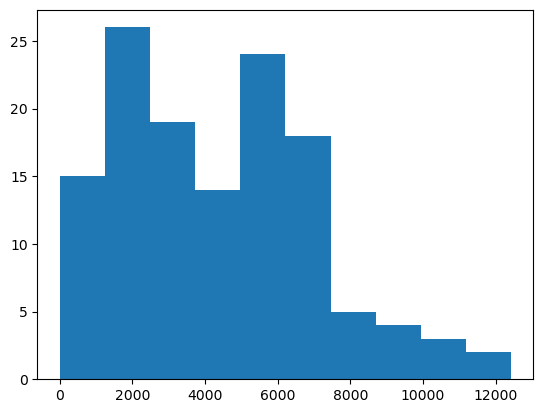

In [40]:
from matplotlib import pyplot as plt
plt.hist(num)

country: <4

**focus on combined questions with total counts>6476+100**:

In [68]:
[(i,j) for i,j in zip(idx,num) if j>6576]

[('6', 12418),
 ('12', 8519),
 ('13', 8238),
 ('21', 11171),
 ('38', 8158),
 ('42', 12163),
 ('49', 8077),
 ('51', 10958),
 ('58', 10853),
 ('62', 7077),
 ('78', 9055),
 ('85', 9546),
 ('86', 7312),
 ('95', 7524),
 ('96', 6587),
 ('97', 8892),
 ('144', 9744)]

## [6]:

In [47]:
grpdQ[6]

['Has the employer hired new workers to replace striking workers during a strike?',
 'Has the employer tried to prevent any workers from participating in a strike?',
 'Has the employer tried to prevent workers from participating in a strike?']

In [54]:
len(df[df.QCleaned.isin(['Has the employer tried to prevent any workers from participating in a strike?',
 'Has the employer tried to prevent workers from participating in a strike?'])]),\
    len(df[df.QCleaned=="Has the employer hired new workers to replace striking workers during a strike?"])

(6209, 6209)

In [99]:
tabCountry( 'Has the employer tried to prevent any workers from participating in a strike?')

Cambodia      2236
Indonesia      833
Bangladesh     584
Jordan         474
Haiti          161
Nicaragua      119
Name: Country, dtype: int64

In [63]:
df[df.QCleaned.str.contains("strike")].QCleaned.unique()

array(['Has the employer hired new workers to replace striking workers during a strike?',
       'Does the employer force workers to work to discipline them or as punishment for participation in a strike?',
       'Has the employer called security guards, the police or armed forces to break up a peaceful strike or arrest striking workers?',
       'Has the employer tried to prevent workers from participating in a strike?',
       'Has the employer tried to prevent any workers from participating in a strike?'],
      dtype=object)

In [65]:
len(df[df.QCleaned=='Has the employer called security guards, the police or armed forces to break up a peaceful strike or arrest striking workers?'])

1802

**can be breakdown into 2 groups** (ask)
## [12]:

In [66]:
grpdQ[12]

['Does the employer provide adequate washing facilities and cleansing materials in the event of exposure to hazardous chemicals?',
 'Has the employer prepared for response, control and cleaning of chemical spills?',
 'Does the employer provide adequate washing facilities and cleaning materials in the event of exposure to hazardous chemicals?']

In [69]:
len(df[df.QCleaned=='Has the employer prepared for response, control and cleaning of chemical spills?'])

2270

8519-2270=6249 &rarr; ask
## [13]:

In [71]:
grpdQ[13]

['Does the employer change the employment status, position, wages, benefits or seniority of workers during maternity leave?',
 'Does the employer terminate workers who are on maternity leave or force them to resign?']

In [73]:
len(df[df.QCleaned=='Does the employer terminate workers who are on maternity leave or force them to resign?'])

2503

In [120]:
df[df.QCleaned.isin(['Terminate workers due to pregnancy or maternity leave'])].Q.unique()

array(["Does the employer terminate workers due to the worker's pregnancy, maternity leave, marriage, or breast-feeding of a child under 12 months of age or force them to resign?",
       'Does the employer terminate workers who are pregnant or on maternity leave or force them to resign?',
       'Does the employer dismiss workers or force them to resign if they are pregnant, on maternity leave or nursing?',
       'Does the employer terminate workers who are pregnant or force them to resign?',
       'Does the employer dismiss workers or force them to resign if they are pregnant, on maternity leave or nursing? [differentiation question]',
       'Does the employer terminate workers who are pregnant or on maternity leave or force them to resign ?',
       "Does the employer terminate workers due to the worker's pregnancy, maternity leave, or breast-feeding of a child under 12 months of age or force them to resign?",
       "Does the employer terminate workers due to the worker's pregna

In [125]:
for i in df[df.QCleaned.isin(['Terminate workers due to pregnancy or maternity leave'])].Q.unique():
    print(len(df[df.Q==i]))

721
1621
55
2503
106
480
1054
27


In [82]:
for q in keyWordQuery("maternity").QCleaned.unique():
    print(q,getQNum(q)+2503)

Terminate workers due to pregnancy or maternity leave 9070
Payment for maternity leave 8977
Does the employer change the employment status, position, wages, benefits or seniority of workers during maternity leave? 8238
Are periods of maternity leave included in a worker's period of continuous service? 4305
Does the employer comply with the entitlement to maternity leave? 4305
Is maternity leave excluded from workers' period of continuous service? 6275
Does the employer provide 1.5 months of maternity rest before a worker’s estimated due date and another 1.5 months after delivery? 2856
Does the employer pay 3% of workers' basic salary to OFATMA for maternity and health insurance? 2664
Does the employer terminate workers who are on maternity leave or force them to resign? 5006
Does the employer include the entire period of continuous employment when determining workers' entitlements to maternity leave, attendance bonus, seniority bonus, and/or annual leave? 5006
Does the employer provide

In [143]:
df.cleaned.value_counts()

0    820466
1    233138
Name: cleaned, dtype: int64

In [181]:
df.to_csv("r1.csv",index=False)

In [195]:
df[(df.QCleaned.str.contains("Terminate workers due to pregnancy")) & (df.Country=="Cambodia")].Q.value_counts()

Does the employer terminate workers who are pregnant or force them to resign?                          2503
Does the employer terminate workers who are pregnant or on maternity leave or force them to resign?      91
Name: Q, dtype: int64

In [191]:
df[df.CPCleaned=="Gender"].QCleaned.value_counts()

Terminate workers due to pregnancy or maternity leave                                                                                                                                                                        6567
Gender discrimination on conditions of work                                                                                                                                                                                  6476
Sexual harassment                                                                                                                                                                                                            6476
Does the employer change the employment status, position, wages, benefits or seniority of workers during maternity leave?                                                                                                    5735
Is gender a factor in decisions regarding pay?                                                  

In [196]:
df[df.CPCleaned=="Gender"].QCleaned.unique()

array(['Gender discrimination on conditions of work',
       'Terminate workers due to pregnancy or maternity leave',
       'Sexual harassment',
       'Is the gender or marital status of a worker a factor in decisions regarding pay?',
       'Is the gender or marital status of a worker a factor in decisions regarding opportunities for promotion or access to training?',
       'Is the gender or marital status of the worker a factor in employer decisions regarding termination or retirement of workers?',
       'Does the employer require pregnancy tests or use of contraceptives as a condition of employment?',
       'Does the employer change the employment status, position, wages, benefits or seniority of workers during maternity leave?',
       "Are periods of maternity leave included in a worker's period of continuous service?",
       'Do job announcements refer to the applicants gender or marital status?',
       "Is an applicant's gender or marital status a factor in hiring decisio

In [200]:
df[(df.CPCleaned=="Coercion") & (df.Country=="Jordan")].Q.unique()


array(['Does the employer restrict workers from leaving the workplace?',
       'Are workers free to terminate their employment with reasonable notice, and to leave their jobs when their contracts expire?',
       'Does the employer force workers to work to discipline them or as punishment for participation in a strike?',
       'Does the employer use violence or the threat of violence to intimidate workers?',
       'Does the employer use threats such as deportation, cancellation of visas or reporting to the authorities in order to force workers to stay at the job?',
       "Does the employer restrict workers' freedom to come and go from the dormitories and/or the industrial park or zone in which the factory is located?",
       'Does the employer delay or withhold wage payments in order to coerce workers to work?'],
      dtype=object)

In [204]:
df[df.CP=="Religion and Political Opinion"].Country.unique()

array(['Vietnam'], dtype=object)